In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

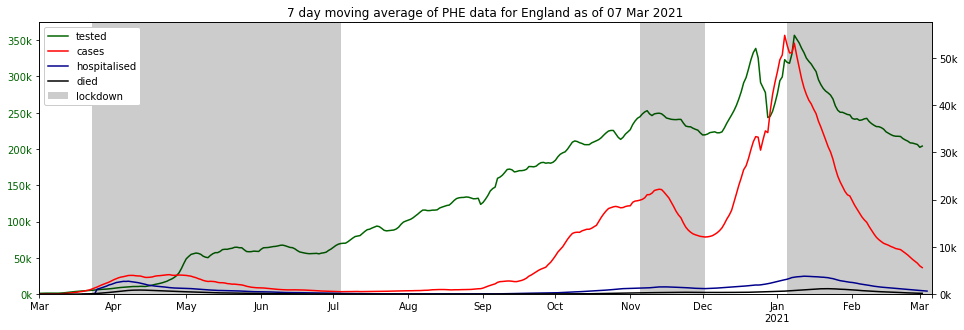

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

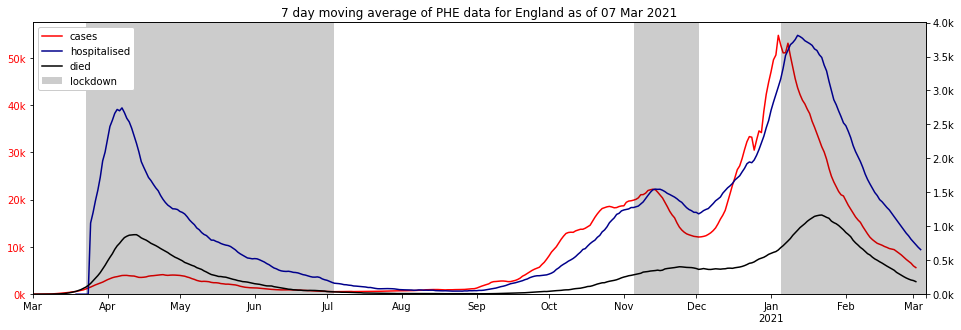

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,788188.0,18875389.0,18087201.0,56286961,1.400303,32.133909,66.465788
1,Northern Ireland,N92000002,42230.0,582914.0,540684.0,1893667,2.230065,28.552222,69.217714
2,Scotland,S92000003,115930.0,1759750.0,1643820.0,5463300,2.121978,30.088408,67.789614
3,Wales,W92000004,176054.0,995059.0,819005.0,3152879,5.583912,25.976417,68.439671


'partial: 22,213,112 (33.3%), full: 1,122,402'

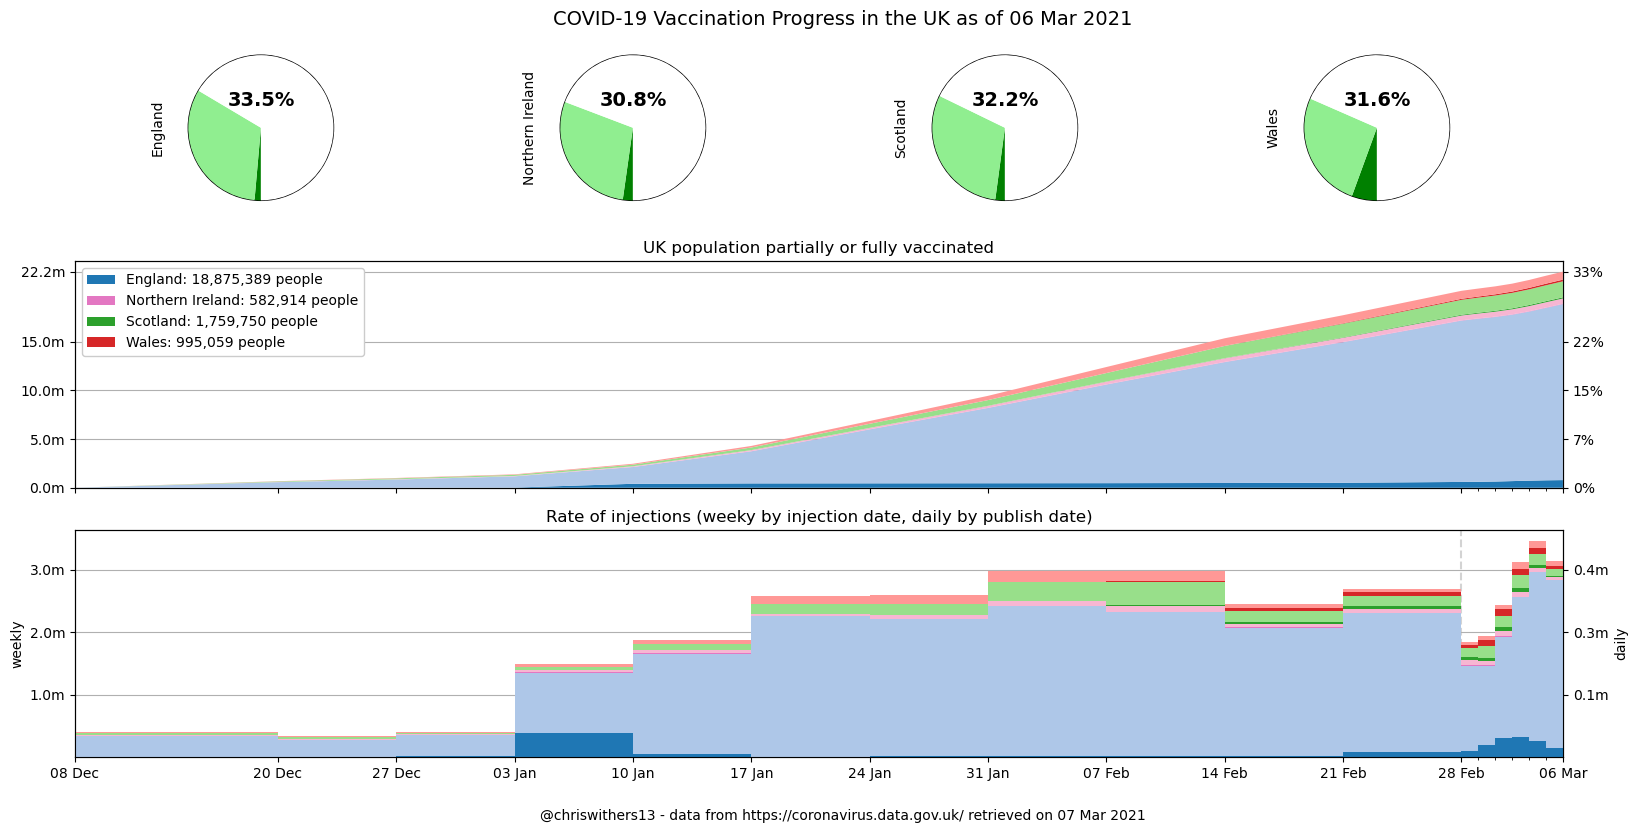

In [33]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,06 Mar 21,"+383,618","+21,688","+21,688","+18,875,389","+788,188","+788,188"
Northern Ireland,06 Mar 21,"+5,695",+134,+134,"+582,914","+42,230","+42,230"
Scotland,06 Mar 21,"+15,881","+1,849","+1,849","+1,759,750","+115,930","+115,930"
Wales,06 Mar 21,"+11,640","+7,891","+7,891","+995,059","+176,054","+176,054"


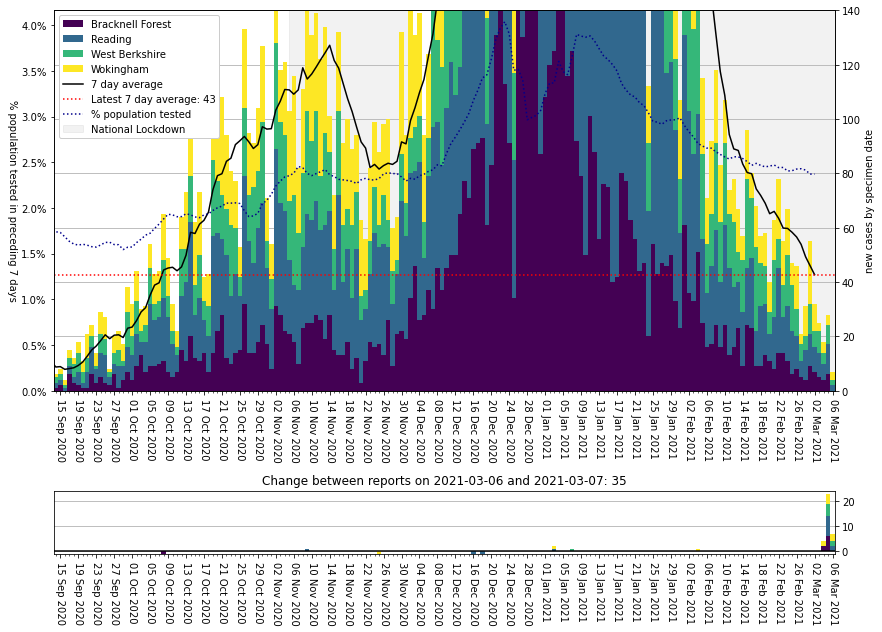

In [26]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

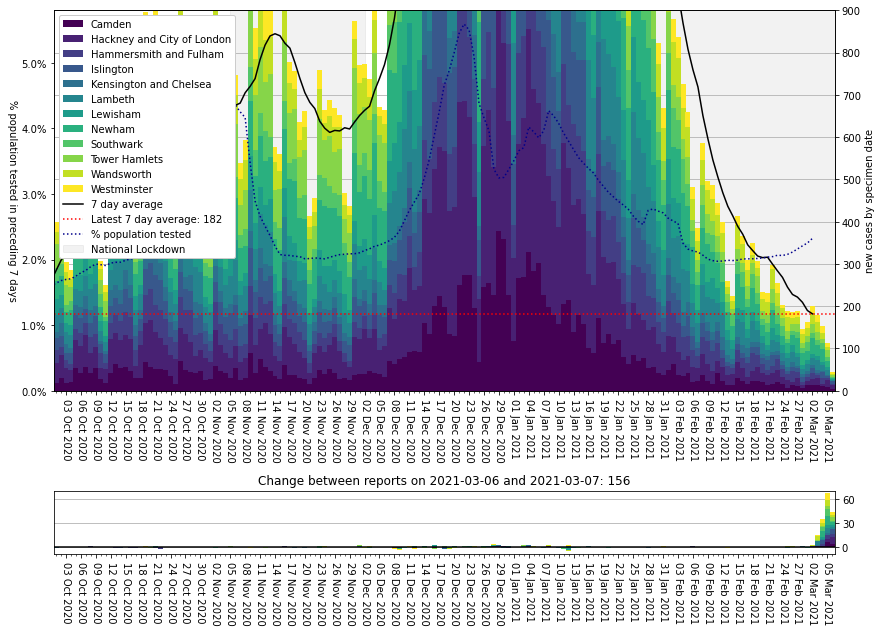

In [31]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000018,Rotherham,136.392237,362.0,2021-03-06
S12000005,Clackmannanshire,133.876601,69.0,2021-03-06
E07000236,Redditch,129.015611,110.0,2021-03-06
E07000035,Derbyshire Dales,128.586243,93.0,2021-03-06
E08000016,Barnsley,128.409745,317.0,2021-03-06
E06000010,"Kingston upon Hull, City of",127.416486,331.0,2021-03-06
E08000032,Bradford,125.422397,677.0,2021-03-06
E07000039,South Derbyshire,123.996606,133.0,2021-03-06
E07000140,South Holland,122.080847,116.0,2021-03-06


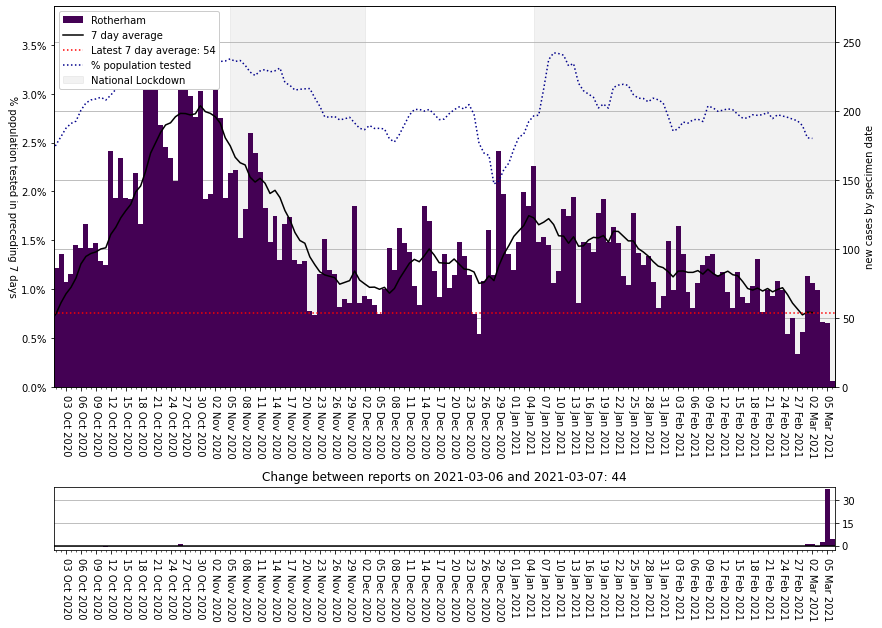

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,78.471488,896.0,2021-03-06
E08000035,Leeds,87.122182,691.0,2021-03-06
E08000032,Bradford,125.422397,677.0,2021-03-06
S12000049,Glasgow City,99.349254,629.0,2021-03-06
E06000016,Leicester,121.674421,431.0,2021-03-06
E08000036,Wakefield,117.997657,411.0,2021-03-06
E08000019,Sheffield,68.393254,400.0,2021-03-06
E08000034,Kirklees,90.953120,400.0,2021-03-06
E06000047,County Durham,69.044358,366.0,2021-03-06


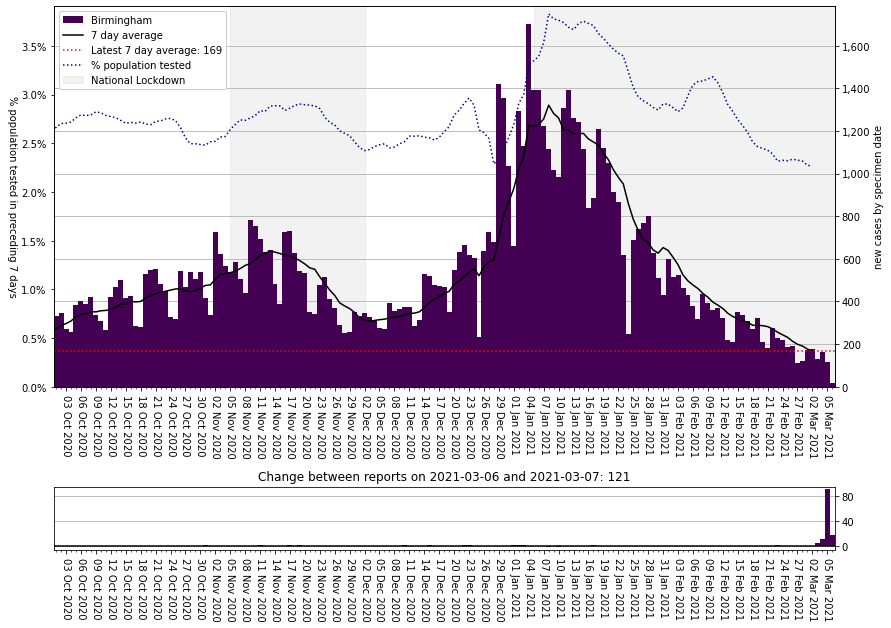

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [23]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.8
phe_max = 0.25

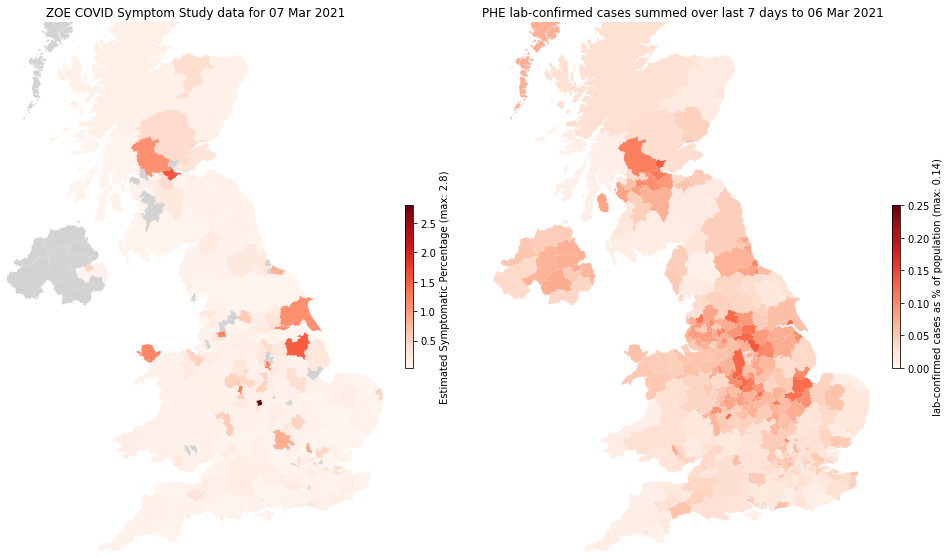

In [24]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [25]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

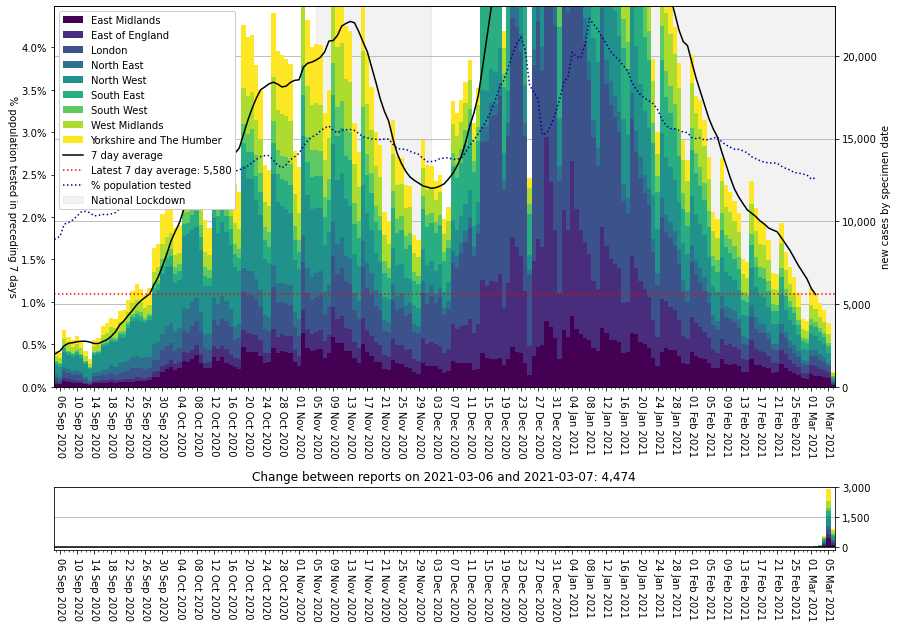

In [28]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-09-05')

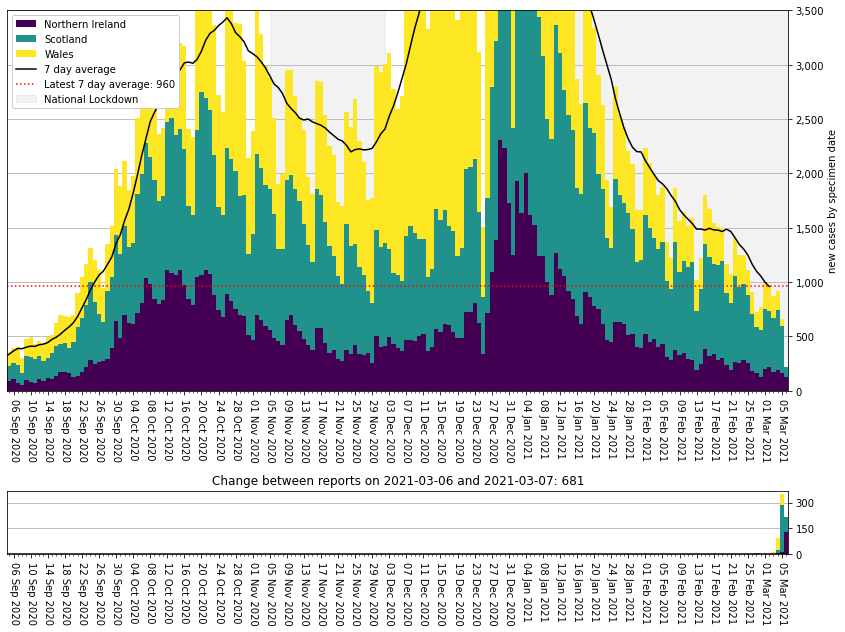

In [29]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-09-05')